In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [13]:
import os
import numpy as np
from PIL import Image

data = []
labels = []
classes = 43
full_path = "C:/Users/Elsayed Hassan/Downloads/archive (1)/Train" 

for i in range(classes):
    path = os.path.join(full_path, str(i))  # Construct path for each class folder
    
    if not os.path.exists(path):  # Check if the class folder exists
        print(f"Warning: Directory {path} does not exist.")
        continue

    images = os.listdir(path)

    for a in images:
        try:
            image_path = os.path.join(path, a)  # Construct the full path to the image
            image = Image.open(image_path)
            image = image.resize((30, 30))  # Resize the image to 30x30
            image = np.array(image)  # Convert to numpy array
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(f"Error Loading Image {image_path}: {e}")

data = np.array(data)
labels = np.array(labels)


In [14]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [15]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.25, random_state=42)

In [16]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(29406, 30, 30, 3) (9803, 30, 30, 3) (29406,) (9803,)


In [17]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [20]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

C:\Users\Elsayed Hassan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 22, 22, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 9, 9, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         147,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │          11,051 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 242,251 (946.29 KB)

 Trainable params: 242,251 (946.29 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
epochs = 15
hist = model.fit(x_train, y_train, batch_size=64, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/15
460/460 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.1835 - loss: 4.9592 - val_accuracy: 0.8292 - val_loss: 0.8494
Epoch 2/15
460/460 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.6759 - loss: 1.1507 - val_accuracy: 0.8937 - val_loss: 0.4648
Epoch 3/15
460/460 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.7929 - loss: 0.7104 - val_accuracy: 0.9419 - val_loss: 0.2092
Epoch 4/15
460/460 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.8538 - loss: 0.4913 - val_accuracy: 0.9608 - val_loss: 0.1432
Epoch 5/15
460/460 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.8787 - loss: 0.4004 - val_accuracy: 0.9681 - val_loss: 0.1231
Epoch 6/15
460/460 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.8960 - loss: 0.3508 - val_accuracy: 0.9679 - val_loss: 0.1187
Epoch 7/15
460/460 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9085 - loss: 0.2968 - val_accuracy: 0.9685 - val_loss: 0.1122
Epoch 8/15
460/460 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9223 - loss: 0.2722 - 

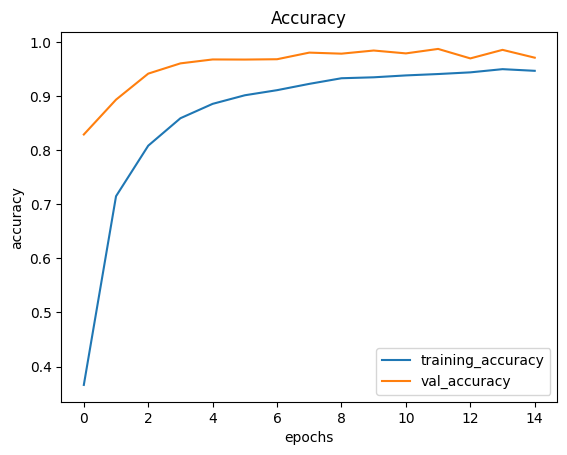

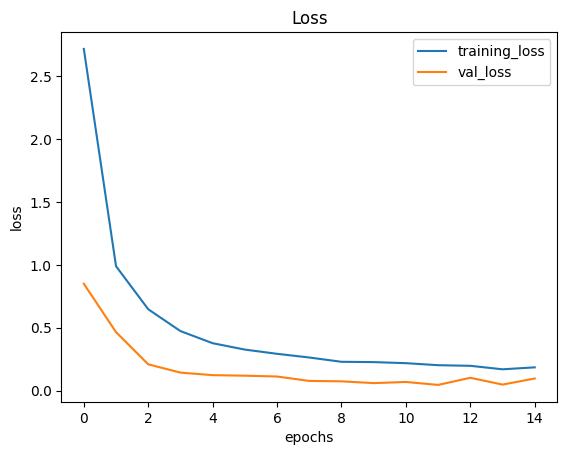

In [30]:
plt.figure(0)
plt.plot(hist.history['accuracy'], label='training_accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()



plt.figure(1)
plt.plot(hist.history['loss'], label='training_loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()


In [42]:
model.save('traffic_classifier.h5')